Found 92 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.1755 - loss: 2.4911 - val_accuracy: 0.2000 - val_loss: 1.6556
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.3478 - loss: 1.5586 - val_accuracy: 0.2800 - val_loss: 1.5803
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.4131 - loss: 1.5243 - val_accuracy: 0.2400 - val_loss: 1.5583
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.3616 - loss: 1.4623 - val_accuracy: 0.3200 - val_loss: 1.4902
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 0.7237 - loss: 1.2476 - val_accuracy: 0.3200 - val_loss: 1.4357
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6438 - loss: 1.0864 - val_accuracy: 0.3600 - val_loss: 1.4580
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.7554 - loss: 0.8803 - val_accuracy: 0.4000 - val_loss: 1.3148
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s

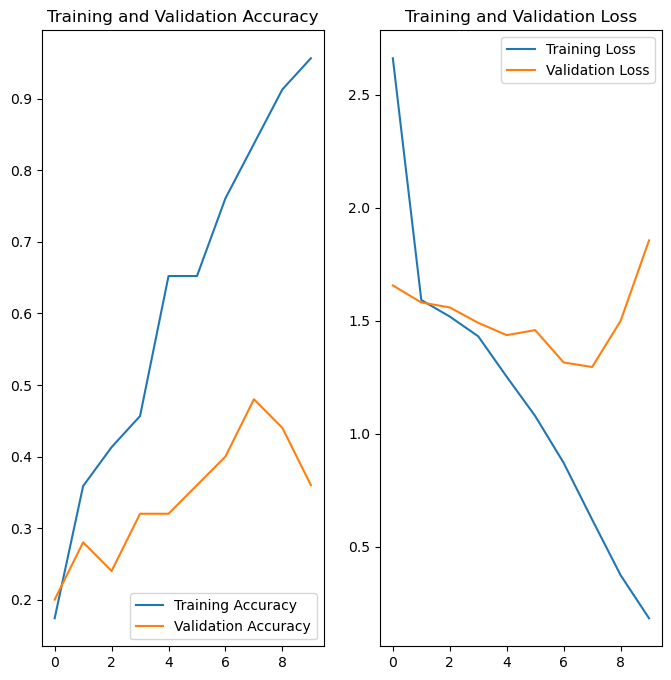

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Image dimensions
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

# Create ImageDataGenerator for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
